# Introduction
This notebook provides some examples of how to examine 2D DRP products. It is _not_ exhaustive.

FIXME: certain plots appear twice. Need to investigate why.

# Setup
## Common imports 

In [1]:
from datetime import datetime
import os
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 7)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

/tmp/ipykernel_39433/3541075480.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import lsst.geom as geom
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay

from pfs.datamodel.pfsConfig import PfsConfig, PfsDesign, FiberStatus, TargetType
from pfs.drp.stella import DetectorMap

from pfs.drp.stella.utils import addPfsCursor, showAllSpectraAsImage, showDetectorMap
from lsst.obs.pfs.utils import getLampElements

import pfs.drp.stella.utils.stability as stability

In [3]:
from pfs.drp.stella import ReferenceLine, ReferenceLineSet, ReferenceLineStatus, ReferenceLineSource

In [4]:
# For storing figures temporarily
# figDirOrig = '/scratch/hassans/tmp'

## Setup display backend

In [5]:
afwDisplay.setDefaultBackend("matplotlib")
# Overlay mask plane color for ``BAD_FLAT``.
afwDisplay.setDefaultMaskPlaneColor("BAD_FLAT", afwDisplay.CYAN)

# Create butler

In [6]:
base, rerun = "/work/drp", "hassans/rhl/v83259-adjustdetmap"
dataDir = os.path.join(base, "rerun", rerun)
calibRoot = "/work/drp/CALIB"
butler = dafPersist.Butler(dataDir, calibRoot=calibRoot)

/tmp/ipykernel_39433/1297826220.py:4: FutureWarning: Gen2 Butler has been deprecated (PfsButler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler(dataDir, calibRoot=calibRoot)
/tmp/ipykernel_39433/1297826220.py:4: FutureWarning: Gen2 Butler has been deprecated (PfsMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler(dataDir, calibRoot=calibRoot)


lsst.CameraMapper INFO: Loading exposure registry from /work/drp/registry.pgsql
lsst.CameraMapper INFO: Loading calib registry from /work/drp/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /work/drp/CALIB/calibRegistry.sqlite3


In [7]:
dataId = dict(visit=83259, arm="b", spectrograph=3)

In [8]:
pfsConfig = butler.get("pfsConfig", dataId)

In [9]:
detMap = butler.get("detectorMap", dataId)

# Find the pixel coordinates for an example fiberId (1644) and wavelength(557.89nm = ``OI]`` line) 

In [10]:
point2d = detMap.findPoint(1644, 557.89) 

# Plot postISRCCD image
This has been generated using ``reduceExposure.py``. Can also be created using ``detrend.py``.

/work/hassans/software/drp_stella/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


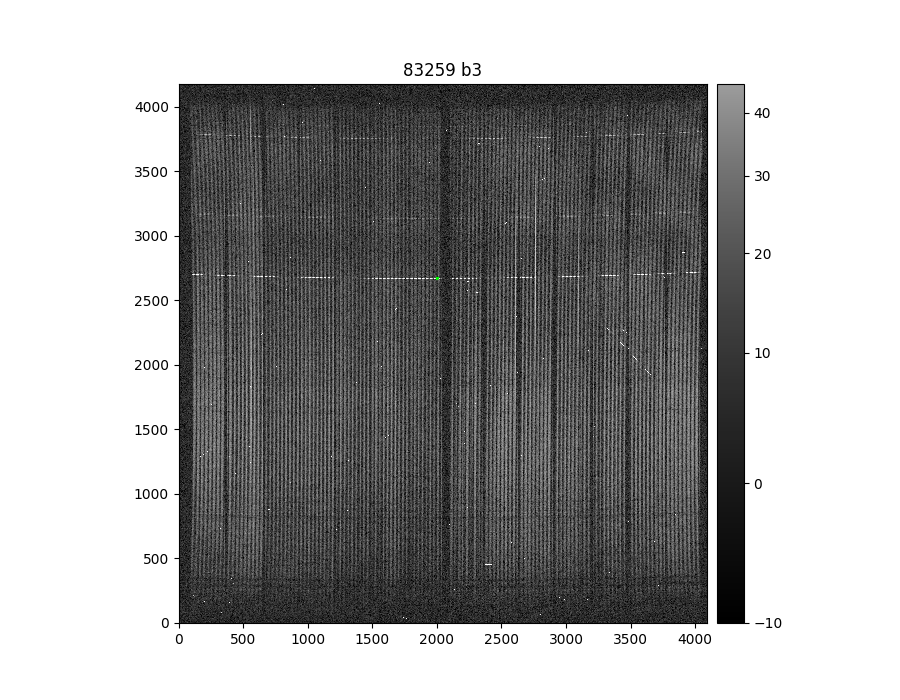

In [11]:
exp = butler.get("postISRCCD", dataId)

figNum = 1; plt.close(figNum); fig = plt.figure(figNum)
disp = afwDisplay.Display(fig)
disp.scale('asinh', 'zscale', Q=3)
disp.mtv(exp, title='%(visit)d %(arm)s%(spectrograph)d' % dataId)
# Overlay a dot at a point2D object pointed above
disp.dot("+", point2d.getX(), point2d.getY())
# Overlay cursor to find x,y, fiberId and wavelength interactively
addPfsCursor(disp, detMap);

# Look at pfsArm data

In [12]:
pfsArm = butler.get('pfsArm', dataId)

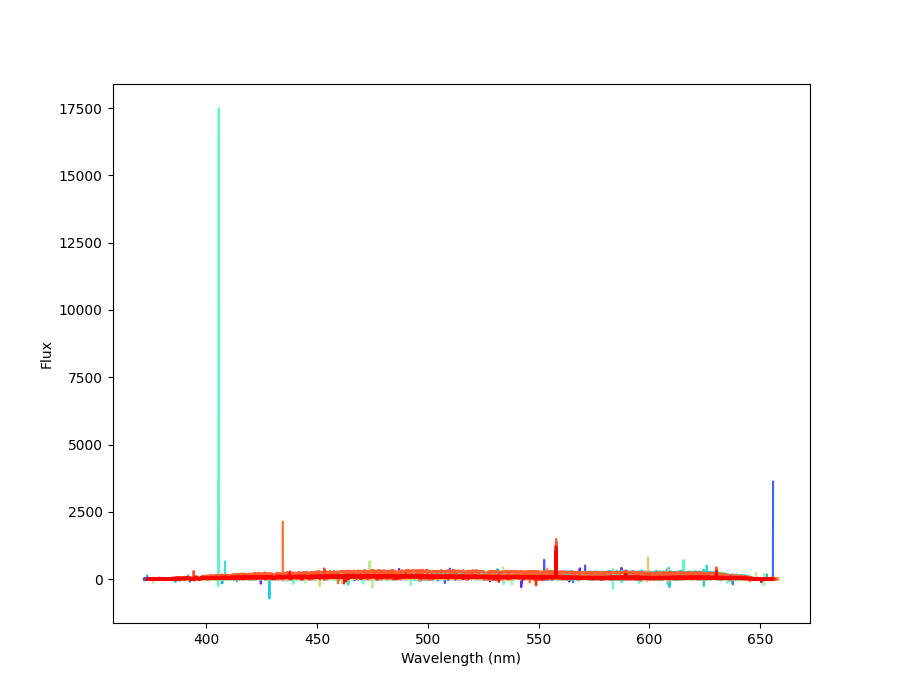

Text(0.5, 1.0, '83259 b3')

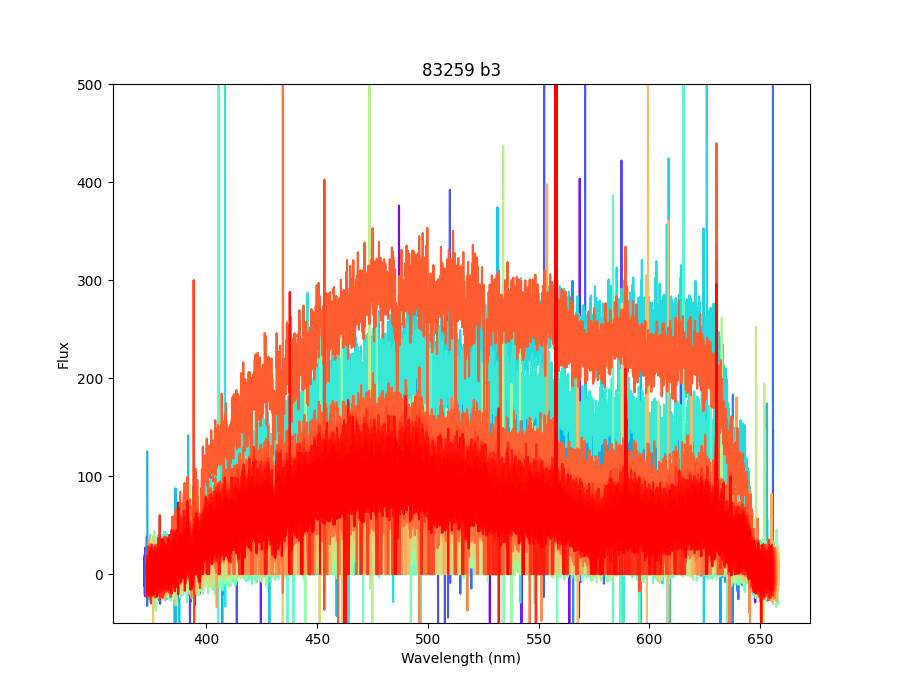

In [13]:
fig, axes = pfsArm.plot()
axes.set_ylim(-50, 500)
axes.set_title('%(visit)d %(arm)s%(spectrograph)d' % dataId)

In [14]:
arm1303=pfsArm[pfsArm.fiberId==1303]

In [15]:
type(arm1303)

pfs.drp.stella.datamodel.drp.PfsArm

In [16]:
arm1303.norm

array([[1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

# Use ``detectorMap.display()`` to overlay wavelengths on a postISRCCD image

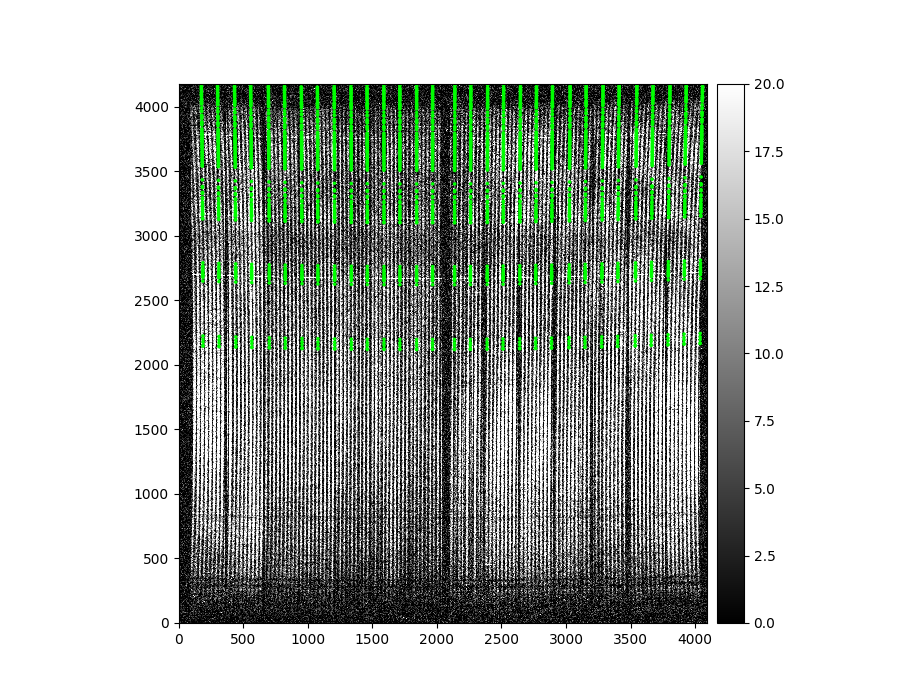

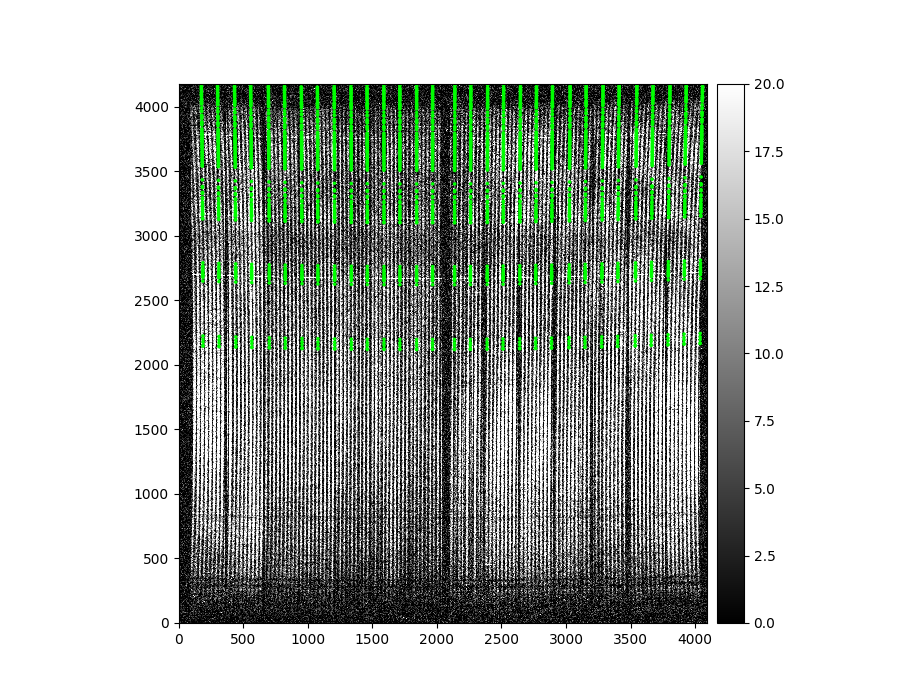

In [17]:
display = afwDisplay.Display(frame=3)
display.scale("linear", 0, 20)
display.mtv(exp)
from pfs.drp.stella.readLineList import ReadLineListTask
lines = ReadLineListTask().run(detectorMap=detMap, metadata=exp.getMetadata())
# Restrict pfsConfig only for spectrograph 3, otherwise certain fiberIds would be out-of-scope for the b3 detectormap
pfsConfig3 = pfsConfig.select(spectrograph=3)
detMap.display(display, fiberId=pfsConfig3.fiberId[::20], wavelengths=lines.wavelength, plotTraces=False); 

# Example stability plots

In [18]:
base, rerun = "/work/drp", "hassans/dev/v45784_w.2022.34-oldskylines"

dataDir = os.path.join(base, "rerun", rerun)
calibRoot = os.path.join(base, "CALIB-20220630")
butler = dafPersist.Butler(dataDir, calibRoot=calibRoot)    

lsst.CameraMapper INFO: Loading exposure registry from /work/drp/registry.pgsql
lsst.CameraMapper INFO: Loading calib registry from /work/drp/CALIB-20220630/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /work/drp/CALIB-20220630/calibRegistry.sqlite3


In [19]:
dataId = dict(visit=45784, arm="r", spectrograph=1)

/work/hassans/software/drp_stella/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "
/work/hassans/software/drp_stella/python/pfs/drp/stella/utils/display.py:216: UserWarning: addPfsCursor: Using an old version of display_matplotlib. Ideally need one that has the method DisplayImpl.set_format_coord. Using workaround.
  warnings.warn("addPfsCursor: Using an old version of display_matplotlib. "


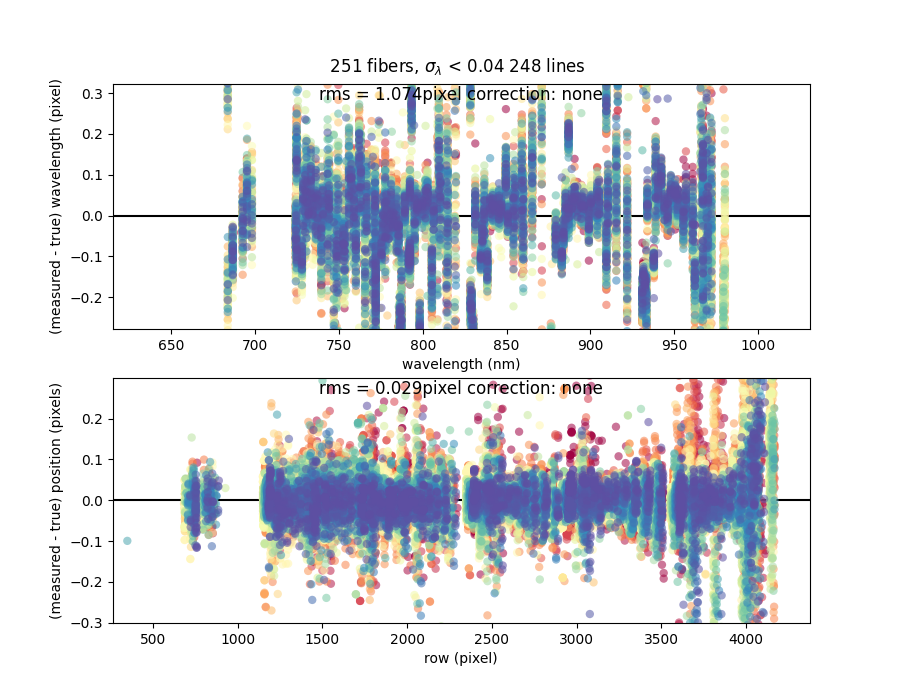

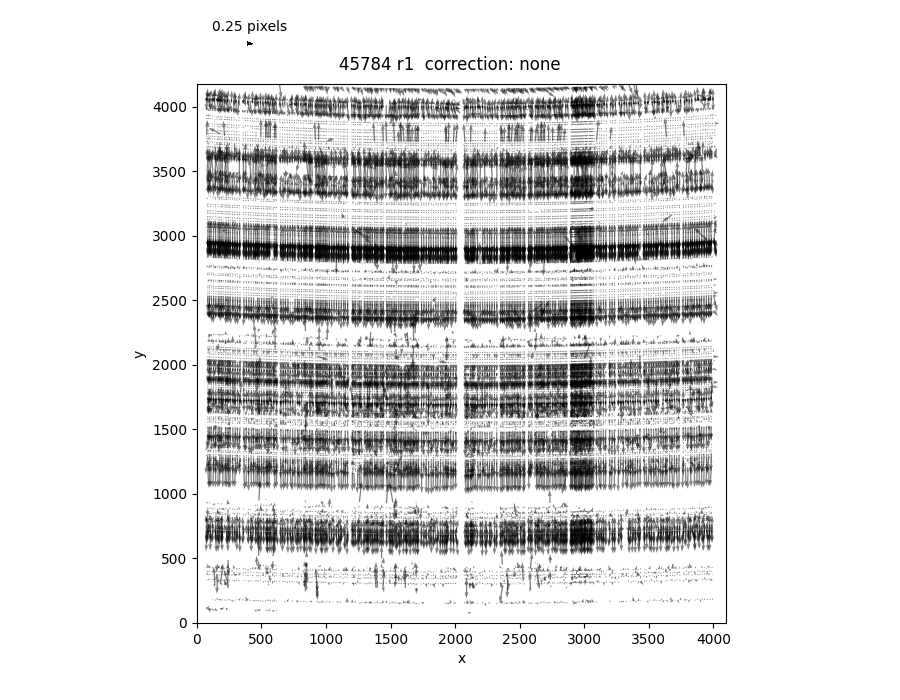

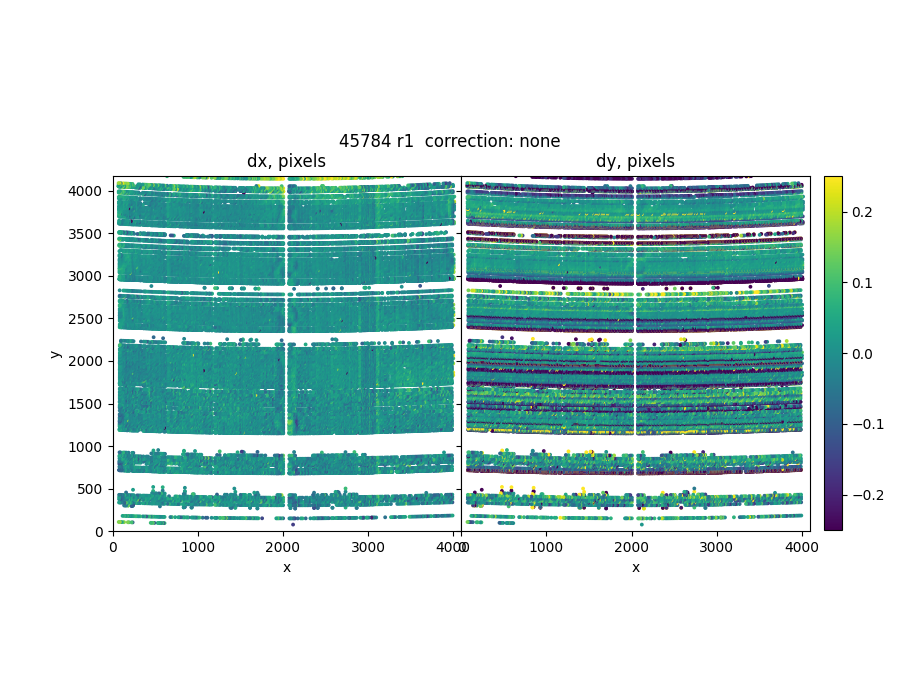

In [20]:
detMap = butler.get("detectorMap_used", dataId)

arcLineSet = butler.get('arcLines', dataId)
als = stability.addTraceLambdaToArclines(arcLineSet, detMap)

fitType = None if True else "median" if True else "per fiber" 
hexBin = False
nsigma = -4 # clip at nsigma, if > 0
plotWavelength = True
usePixels = True    # report wavelength residuals in pixels, not nm
showChi = False
lamErrMax = 0.04
soften = 0.012
arrowSize = 0.25   # for arrows and range in dx and dy plots
fig = stability.plotArcResiduals(als, detMap, fitType=fitType, plotWavelength=plotWavelength,
                                 usePixels=usePixels, showChi=showChi, hexBin=hexBin,
                                 soften=soften, lamErrMax=lamErrMax, nsigma=nsigma)
for drawQuiver in [True, False]:
    hexBin = False   # useful with fully populated slits, or even SuNSS

    fig = stability.plotArcResiduals2D(als, detMap, drawQuiver=drawQuiver, hexBin=hexBin,
                                       title='%(visit)d %(arm)s%(spectrograph)d' % dataId,
                                       vmin=-arrowSize, vmax=arrowSize,
                                       fitType=fitType, arrowSize=arrowSize)